### Chapter4_Queation 13

This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

In [1]:
from ISLP import load_data
df = load_data('Weekly')

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

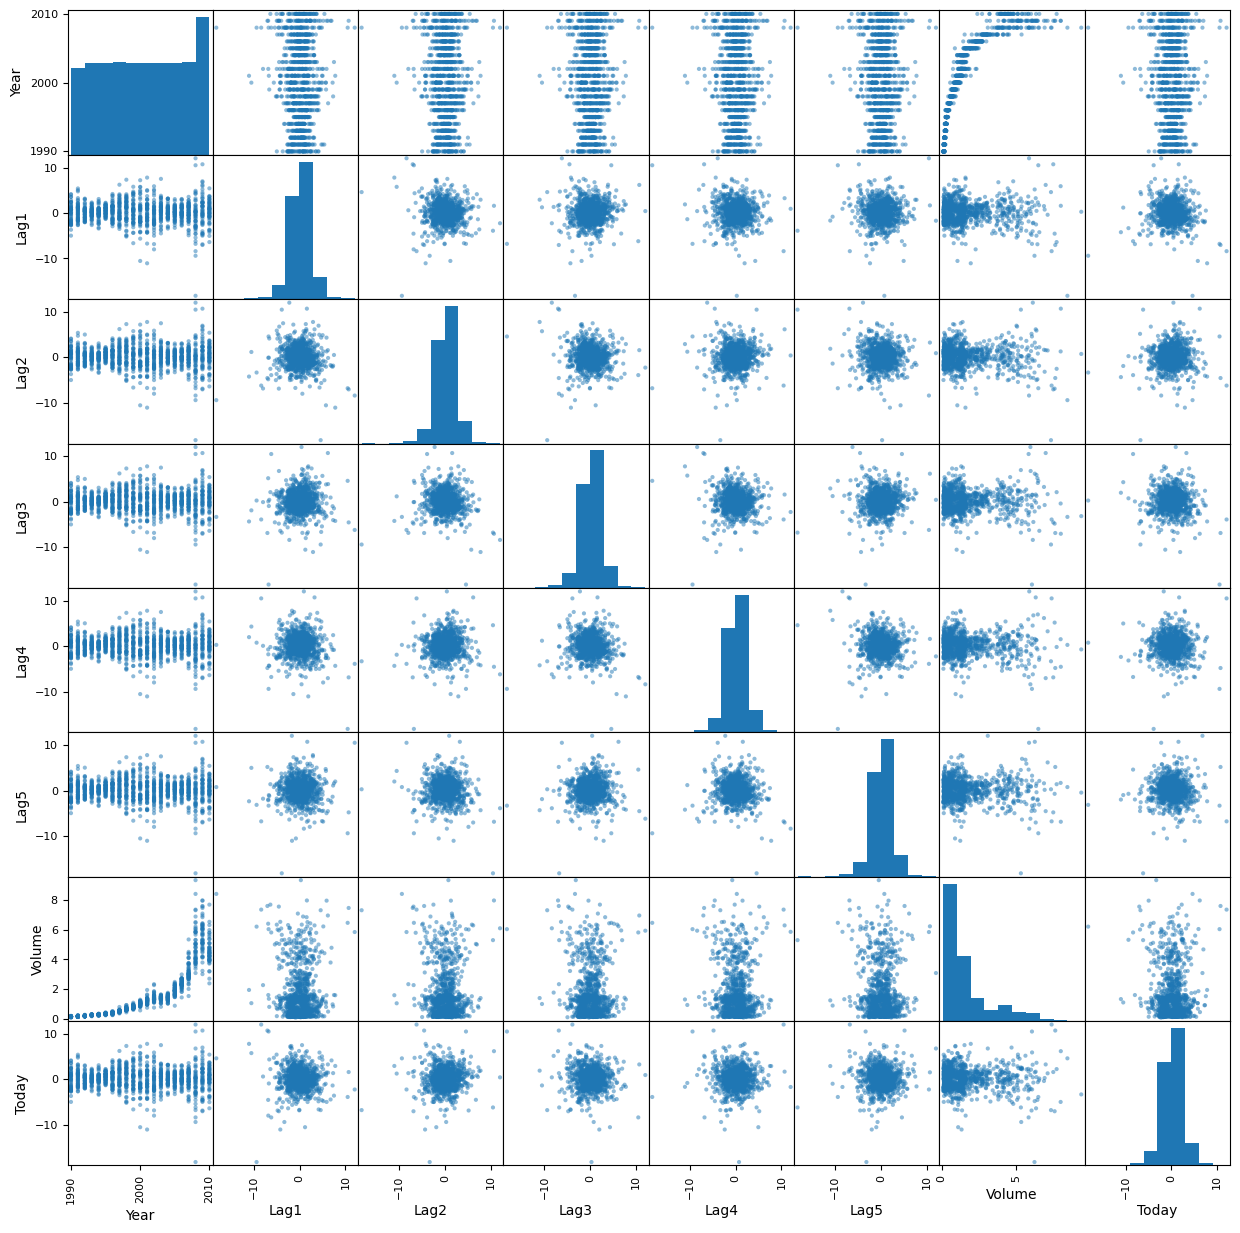

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

cols = df.columns.tolist()

scatter_matrix(df[cols], diagonal="hist")
plt.gcf().set_size_inches(15, 15)
plt.show()

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod import families
from ISLP.models import ( ModelSpec as MS , summarize )
from ISLP import confusion_table
from sklearn. linear_model import LogisticRegression

allvars = df.columns.drop (['Today', 'Year', "Volume","Direction"])
design = MS(allvars)
X = design. fit_transform (df)
y = (df['Direction'] == 'Up').astype(int)
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize (results)

,coef,std err,z,P>|z|
intercept,0.2303,0.062,3.712,0.000
Lag1,-0.0401,0.026,-1.522,0.128
Lag2,0.0602,0.027,2.249,0.025
Lag3,-0.0151,0.027,-0.566,0.571
Lag4,-0.0268,0.026,-1.013,0.311
Lag5,-0.0135,0.026,-0.512,0.609


(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

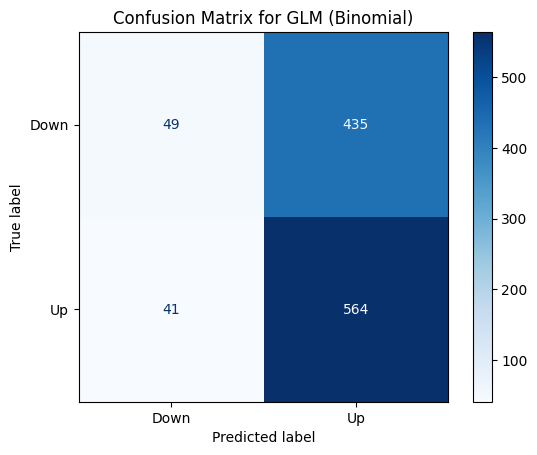

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 預測機率
y_pred_prob = results.predict(X)

# 轉為 0 / 1 預測值（以 0.5 為閾值）
y_pred = (y_pred_prob >= 0.5).astype(int)

# 建立 confusion matrix
cm = confusion_matrix(y, y_pred)

# 繪製
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for GLM (Binomial)")
plt.show()


In [8]:
from ISLP import confusion_table
confusion_table(y, y_pred)

Truth,0,1
Predicted,,
0,49,435
1,41,564


(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Mon, 27 Oct 2025   Deviance:                       1350.5
Time:                        23:13:45   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.0

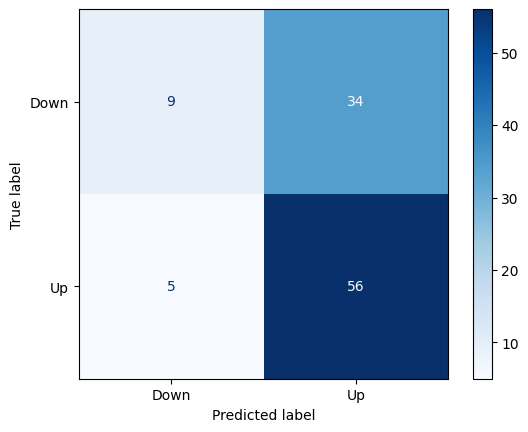

In [9]:
# 2️⃣ Split into train (1990–2008) and test (2009–2010)
train = df[df['Year'] < 2009]
test  = df[df['Year'] >= 2009]

# 3️⃣ Define predictor and target
X_train = sm.add_constant(train['Lag2'])  # Add intercept term
y_train = (train['Direction'] == 'Up').astype(int)

X_test = sm.add_constant(test['Lag2'])
y_test = (test['Direction'] == 'Up').astype(int)

# 4️⃣ Fit logistic regression model
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()

print(results.summary())

# 5️⃣ Predict on the test data
y_pred_prob = results.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# 6️⃣ Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])
disp.plot(cmap='Blues', values_format='d')

# 7️⃣ Compute accuracy
accuracy = (y_pred == y_test).mean()
print("\nConfusion Matrix:\n", cm)
print(f"\nOverall Accuracy: {accuracy:.3f}")